# Previsão de sobrevivencia dos passageiro do navio Titanic

### Introdução
Esta competição tem como intuito a previsão da sobrevivência dos passageiros a bordo do navio Titanic, usando técnicas de machine learning.

In [43]:
import pandas as pd
from matplotlib import pyplot as plt

In [44]:
arquivo = '../dados/Titanic/train.csv'
df = pd.read_csv(arquivo)

In [45]:
# visualizar dados
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Selecionando as colunas


In [46]:
df = df[['Survived','Pclass','Sex','Age','SibSp', 'Parch','Fare','Cabin','Embarked']]

## Hipotes:
* A cabine pode influenciar? Pensando que as cabines ao fundo do navio seria mais difícil sair do navio
* O Sexo e idade pode influenciar ? (crianças e mulheres primeiro ?)
* A classe do passageiro influiencia ?
* Se o pasageiro esta acompanhado por um parente

## Como avaliar isso ?
Comparando o numero de sobrevivencia com as colunas, por exemplo (Pclass, Sex, Age, Parch, fare, cabin, Embarked).
Criando perguntas como: qual o numero de sobrevivênte mulher e homen ?

## Cuidados 
Como, por exemplo, o número pode mostrar que a maior quantidade de passageiro que sobreviveu tinha por volta de 20 a 25 anos
sendo assim é importante saber quantos passageiros possuíam essa idade e também a quantidade de homens e mulheres.
para não ser uma correlaxão 

### Com base nesta analise quais as colunas importantes ?

### Converter valor das colunas onde se tem valor string
* Sex -> (female, male) 0,1


# Analise dos dados

In [40]:
# remover dados faltantes
df = df.dropna(axis=0)

In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S


<AxesSubplot:xlabel='Sex'>

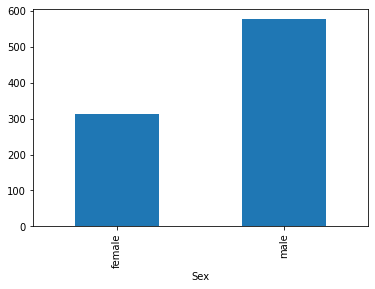

In [55]:
count = df.groupby('Sex')['Survived'].count()
count.plot(kind='bar')

In [123]:
tamanho_conjunto = len(df)
Sex_f = df[df['Sex']=='female']
Sex_m = df[df['Sex']=='male']
Survived_total = df[df['Survived']==1]


# Numero de mulher a bordo
num_mulher = len(Sex_f)

# Numero de homen a bordo
num_homen = len(Sex_m)

# Numero de sobrevivente
num_survived = len(Survived_total)

print(f'Conjunto:{tamanho_conjunto}')
print(f'Sobreviventes:{num_survived}')
print(f'Mulheres:{num_mulher}')
print(f'Homens: {num_homen}')


Conjunto:891
Sobreviventes:342
Mulheres:314
Homens: 577


In [128]:
num_embark = df.groupby('Embarked')['Survived'].count()

<AxesSubplot:xlabel='Embarked'>

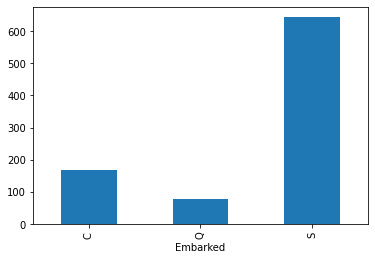

In [130]:
num_embark.plot(kind='bar')

<AxesSubplot:xlabel='Cabin'>

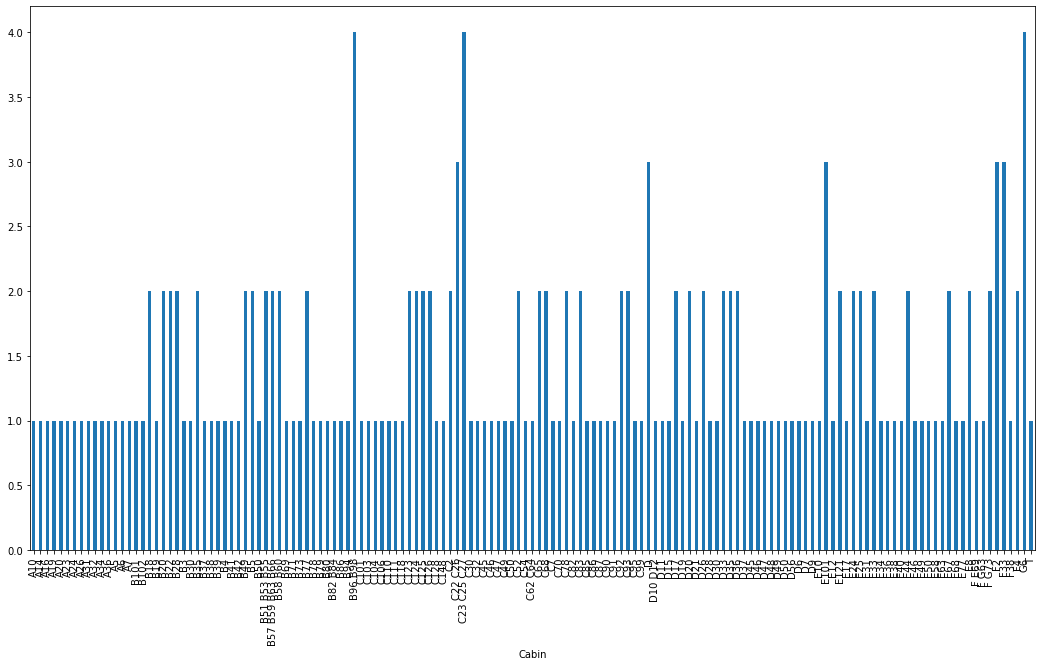

In [134]:
num_survive_cabin = df.groupby('Cabin')['Survived'].count()
num_survive_cabin.plot(kind='bar', figsize=(18,3))
# Parece ser necessario 